### Import Libraries

In [12]:
import zipfile
import numpy as np
import pandas as pd  # Imports the pandas library for data manipulation
import seaborn as sns
import matplotlib.pyplot as mp
%matplotlib inline

### Import Salary Data

In [15]:
zip_file_path = "C:\\Users\\Dell\\Downloads\\Total.csv.zip"  #gets the zip file path

# Open the zip file and read the CSV file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    with zip_ref.open('Total.csv') as file:
        df = pd.read_csv(file, low_memory=False) # Load the CSV file into a DataFrame called salary_data.

# view dataframe
df.head() # displays top 5 rows

EmployeeName                                        JobTitle  \
0     NATHANIEL FORD  GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY   
1       GARY JIMENEZ                 CAPTAIN III (POLICE DEPARTMENT)   
2     ALBERT PARDINI                 CAPTAIN III (POLICE DEPARTMENT)   
3  CHRISTOPHER CHONG            WIRE ROPE CABLE MAINTENANCE MECHANIC   
4    PATRICK GARDNER    DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)   

     BasePay OvertimePay   OtherPay      Benefits   TotalPay  \
0  167411.18        0.00  400184.25  Not Provided  567595.43   
1  155966.02   245131.88  137811.38  Not Provided  538909.28   
2  212739.13   106088.18   16452.60  Not Provided  335279.91   
3   77916.00    56120.71  198306.90  Not Provided  332343.61   
4  134401.60     9737.00  182234.59  Not Provided  326373.19   

   TotalPayBenefits  Year  
0         567595.43  2011  
1         538909.28  2011  
2         335279.91  2011  
3         332343.61  2011  
4         326373.19  2011

## Exploratory Data Analysis

In [16]:
# check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312882 entries, 0 to 312881
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   EmployeeName      312882 non-null  object 
 1   JobTitle          312882 non-null  object 
 2   BasePay           312882 non-null  object 
 3   OvertimePay       312882 non-null  object 
 4   OtherPay          312882 non-null  object 
 5   Benefits          312882 non-null  object 
 6   TotalPay          312882 non-null  float64
 7   TotalPayBenefits  312882 non-null  float64
 8   Year              312882 non-null  int64  
dtypes: float64(2), int64(1), object(6)
memory usage: 21.5+ MB


In [17]:
# check number of rows and columns
print('Dataset has {} Rows and {} Columns'.format(df.shape[0], df.shape[1]))

Dataset has 312882 Rows and 9 Columns


In [18]:
# convert some object to numeric
object_column = ['BasePay', 'OvertimePay', 'OtherPay', 'Benefits'] # create a list of object column to be converted 
for col in object_column:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [19]:
# check data type again to validate convertion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312882 entries, 0 to 312881
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   EmployeeName      312882 non-null  object 
 1   JobTitle          312882 non-null  object 
 2   BasePay           312276 non-null  float64
 3   OvertimePay       312881 non-null  float64
 4   OtherPay          312881 non-null  float64
 5   Benefits          276722 non-null  float64
 6   TotalPay          312882 non-null  float64
 7   TotalPayBenefits  312882 non-null  float64
 8   Year              312882 non-null  int64  
dtypes: float64(6), int64(1), object(2)
memory usage: 21.5+ MB


In [20]:
# check statistical summary of numerical columns
df[['BasePay','TotalPay','Benefits','OvertimePay','OtherPay','TotalPayBenefits']].describe().T

count           mean           std       min         25%  \
BasePay           312276.0   69808.257496  45376.929428   -474.40  35722.3650   
TotalPay          312882.0   78802.645788  53230.758542   -618.13  38803.0000   
Benefits          276722.0   25016.917292  15089.077103 -13939.42  12729.7625   
OvertimePay       312881.0    5668.929393  12745.655309   -292.80      0.0000   
OtherPay          312881.0    3460.694974   7387.263120  -7058.59      0.0000   
TotalPayBenefits  312882.0  100928.339777  66485.186495  -3628.78  48955.0725   

                        50%          75%        max  
BasePay            67710.45   99312.3025  592394.34  
TotalPay           74908.79  111386.8975  592394.34  
Benefits           28327.33   35268.1625  125891.73  
OvertimePay            0.00    5223.1200  309481.03  
OtherPay             728.00    3958.6800  400184.25  
TotalPayBenefits  100011.29  142376.3000  712802.36

In [22]:
# checking unique years present in the dataset and listing the years
A=df['Year'].nunique()
B=df['Year'].unique()
' {} years information are available in the dataset:{}'.format(A,B)

' 8 years information are available in the dataset:[2011 2012 2013 2014 2015 2016 2017 2018]'

In [24]:
# checking the average of all payments and benefits across 8 years
df.groupby('Year').mean(numeric_only=True)

BasePay  OvertimePay     OtherPay      Benefits      TotalPay  \
Year                                                                       
2011  63595.956517  4531.065429  3617.081926           NaN  71744.103871   
2012  65436.406857  5023.417824  3653.437583  26439.966967  74113.262265   
2013  69630.030216  5281.641980  3819.969007  23829.076572  77611.443142   
2014  66564.421924  5401.993737  3505.421251  24789.601756  75471.836912   
2015  68776.293324  5606.934061  3125.042178  24217.640375  77508.269562   
2016  71181.405996  6136.422376  3197.303205  24068.862102  80513.166356   
2017  74570.581134  6325.774603  3338.290051  25434.816408  84234.645789   
2018  76947.426822  6746.790232  3487.691270  26292.455190  87181.908324   

      TotalPayBenefits  
Year                    
2011      71744.103871  
2012     100553.229232  
2013     101440.519714  
2014     100261.438668  
2015     101725.909937  
2016     104581.440982  
2017     109669.462197  
2018     113474.363514

<Axes: xlabel='TotalPay', ylabel='Density'>

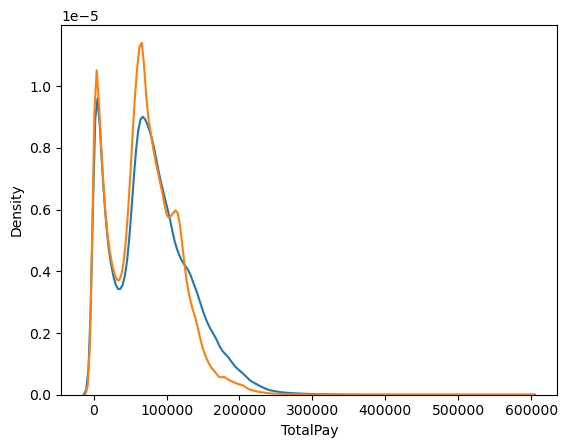

In [25]:
# kernel density plot for Totalpay and Basepay
sns.kdeplot(df['TotalPay'])
sns.kdeplot(df['BasePay'])

<Axes: xlabel='Year', ylabel='TotalPay'>

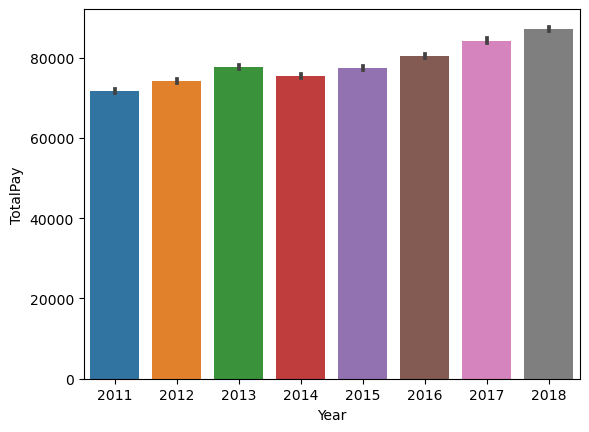

In [26]:
# distribution of total pay across years
sns.barplot(data=df, x='Year', y='TotalPay')

In [13]:
df.groupby('Year').nunique()['JobTitle'] # number of unique job titles across years

Year
2011    1045
2012    1044
2013    1051
2014     996
2015    1010
2016    1009
2017    1017
2018    1000
Name: JobTitle, dtype: int64

## Employee Function with error handling

In [30]:
def get_employee_details(name, data=df):       #define a function which takes in two input parameters
    """
    This function accepts employee's name and returns their details.   
    """
    try:        # Starts error handling to catch issues.
        employee = df[df['EmployeeName'].str.upper() == name.upper()] # Filters the data to find a matching name
        if not employee.empty:
            return employee.to_dict('records')[0]  # this returns employees details as dictionary
        else:
            print("Employee not found.") # returns employee not found if employee is not found
            return None
    except Exception as e:
        print(f"Error retrieving details: {e}") # Prints an error message if an exception occurs.

# Example usage
get_employee_details("PATRICK GARDNER") # apply function to get the details for Patrick Gardner


{'EmployeeName': 'PATRICK GARDNER',
 'JobTitle': 'DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)',
 'BasePay': 134401.6,
 'OvertimePay': 9737.0,
 'OtherPay': 182234.59,
 'Benefits': nan,
 'TotalPay': 326373.19,
 'TotalPayBenefits': 326373.19,
 'Year': 2011}

## Data Processing using dictionary

In [39]:
from itertools import islice   # Imports the 'islice' function from the 'itertools' library, which allows slicing of iterators.

salary_data = {}          # Initializes an empty dictionary named 'salary_data' to store employee information
for index, row in df.iterrows():
    salary_data[row['EmployeeName']] = {
        'JobTitle': row['JobTitle'],
        'BasePay': row['BasePay'],
        'OvertimePay': row['OvertimePay'],
        'OtherPay': row['OtherPay'],
        'Benefits': row['Benefits'],
        'TotalPay': row['TotalPay'],
        'TotalPayBenefits': row['TotalPayBenefits'],
        'Year': row['Year']
    }
    
# displaying 2 salary data
sal_dat = dict(islice(salary_data.items(), 2)) # Slices the first 2 entries from 'salary_data' and converts them to a dictionary
print(sal_dat)  

{'NATHANIEL FORD': {'JobTitle': 'GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY', 'BasePay': 167411.18, 'OvertimePay': 0.0, 'OtherPay': 400184.25, 'Benefits': nan, 'TotalPay': 567595.43, 'TotalPayBenefits': 567595.43, 'Year': 2011}, 'GARY JIMENEZ': {'JobTitle': 'CAPTAIN III (POLICE DEPARTMENT)', 'BasePay': 155966.02, 'OvertimePay': 245131.88, 'OtherPay': 137811.38, 'Benefits': nan, 'TotalPay': 538909.28, 'TotalPayBenefits': 538909.28, 'Year': 2011}}


## Zip filing employees details in CSV

In [42]:
import csv       # Imports the 'csv' library for handling CSV file operations.
import os        # Imports the 'os' library for file and directory management.
import zipfile   # Imports the 'zipfile' library to work with zip archives

# function to export employee details to CSV and zip it
def export_employee_to_csv(name, df, folder_name="Employee Profile"):  # Defines the function, taking employee name, data, and optional folder name as inputs.
    try:
        details = get_employee_details(name, df)
        if details is None:
            print(f"Error: Employee '{name}' not found in the dataset.")
            return  # Exit if employee not found
        
        # Create the directory if it doesn't exist
        try:
            os.makedirs(folder_name, exist_ok=True)
        except OSError as e:
            print(f"Error: Could not create directory '{folder_name}'. {e}")
            return

        # Define the CSV file path
        csv_path = os.path.join(folder_name, f"{name}_details.csv")  # Sets the path for the CSV file, named with the employee's name.
        
        # Write to CSV
        try:
            with open(csv_path, mode='w', newline='') as file:
                writer = csv.DictWriter(file, fieldnames=details.keys())
                writer.writeheader()
                writer.writerow(details)
        except IOError as e:
            print(f"Error: Could not write to CSV file '{csv_path}'. {e}")
            return

        # Zip the folder  #  # Sets the path for the zip file, using the folder name.
        zip_path = f"{folder_name}.zip"
        try:
            with zipfile.ZipFile(zip_path, 'w') as zipf:
                for root, dirs, files in os.walk(folder_name):
                    for file in files:
                        zipf.write(
                            os.path.join(root, file), 
                            os.path.relpath(os.path.join(root, file), folder_name)
                        )
        except zipfile.BadZipFile as e:
            print(f"Error: Could not create zip file '{zip_path}'. {e}")
            return

        print(f"Employee details saved and zipped at: {zip_path}")
    
    except Exception as e:
        print(f"An unexpected error occurred: {e}") # Prints a message if an unexpected error occurs.

# get employee details for patric garner
export_employee_to_csv("PATRICK GARDNER", df)  # Calls the function to export and zip the details of the employee named "PATRICK GARDNER" in the DataFrame 'df'.

Employee details saved and zipped at: Employee Profile.zip
